# 11. Modelling

## 11.1. AR(Autoregressive) Model

In [1]:
# Import modules
import numpy as np
import pandas as pd

from statsmodels.tsa.ar_model import AutoReg  # Autoregression
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# Set Parameters
n = 100  # Number of data points
ar_params = [0.7]  # Autoregressive Parameter
ma_params = []     # Moving Average Parameter
residuals = np.random.normal(0, 1, n)   # (Mean 0, Std 1, Number of residuals n)

In [3]:
# Create AR(1) Model
data = [0]  # Initial value

for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])

data

[0,
 -0.7005453993072385,
 -0.21425282968759196,
 -0.8351067882264298,
 1.236852435161636,
 -0.5175846163775314,
 -0.4710016153504221,
 0.2153549867415258,
 -0.13441836526622084,
 1.7894724719046224,
 0.6834152918817241,
 -0.3381549422685278,
 -0.8473984382196544,
 -0.45598114213757235,
 0.01134000774969568,
 -0.029951120602332876,
 1.073385513578598,
 0.9457522910979699,
 1.5017326466537733,
 3.096205696097461,
 1.1654961182525634,
 1.6399387912622667,
 2.227274234742908,
 2.5395037029464946,
 2.5212711745244434,
 1.2785369637554096,
 -0.33611265209081875,
 1.1918430236290487,
 1.9179907156481975,
 1.546176370060773,
 0.6256864617903606,
 -1.8226340366419498,
 -2.2940734126089737,
 -1.86437120198535,
 -0.9323640344291082,
 0.305976532817259,
 0.8957018347718344,
 2.294386152820472,
 0.5546369951504149,
 -0.5397821702930282,
 -1.4571437552123432,
 -1.8221238144794456,
 -0.5731031007751839,
 -1.0926906623774935,
 -2.0610611936547496,
 -2.1418937879126076,
 -2.3294542441642445,
 -1.11677

In [4]:
# Create a dataframe
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Values': data
})

df

,Date,Values
0,2023-01-01,0.000000
1,2023-01-02,-0.700545
2,2023-01-03,-0.214253
3,2023-01-04,-0.835107
4,2023-01-05,1.236852
...,...,...
95,2023-04-06,-0.850398
96,2023-04-07,-2.286569
97,2023-04-08,-0.192391
98,2023-04-09,-0.031958


In [5]:
# Fit AR(1) model
model = AutoReg(df['Values'], lags=1)  # lags=1: First order Aggressive model
results = model.fit()

#print(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -138.694
Method:               Conditional MLE   S.D. of innovations              0.982
Date:                Fri, 02 Jun 2023   AIC                            283.389
Time:                        23:17:14   BIC                            291.174
Sample:                             1   HQIC                           286.539
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0356      0.099      0.359      0.720      -0.159       0.230
Values.L1      0.7057      0.071      9.907      0.000       0.566       0.845
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4169           +0.0000j            1.4169            0.0000
-----------------------------------------------------------------------------
"""

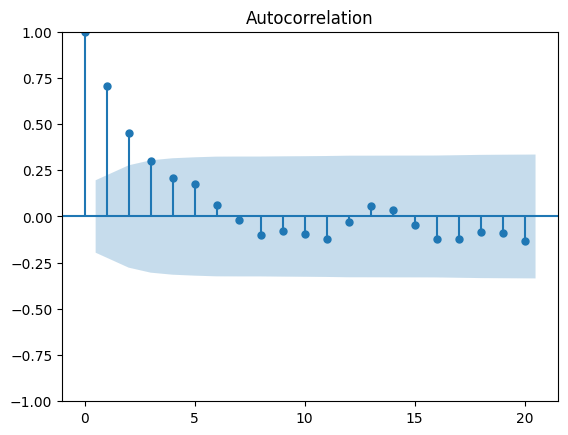

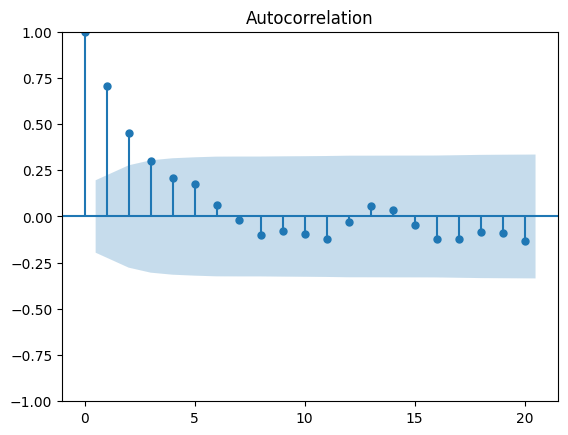

In [6]:
# Visualization: ACF Graph
plot_acf(df['Values'], lags=20)

## 11.2. MA(Moving Average) Model

In [7]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [8]:
# Set Parameters
np.random.seed(85)

n = 100
ma_params = [0.4, -0.2]  # Coefficient
residuals = np.random.normal(0, 1, n)  # (Mean 0, Std 1, Number of residuals n)

In [9]:
# Generate MA(2) Model
data = [0, 0]  # Initial value

for i in range(2, n):
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] + residuals[i])

In [10]:
# Create a dataframe
df = pd.DataFrame({'Values': data})

df

,Values
0,0.000000
1,0.000000
2,1.914464
3,-1.386208
4,-0.543617
...,...
95,-1.888618
96,-0.035981
97,-0.394376
98,-1.618467


In [11]:
# Fit MA(2) Model
model = ARIMA(df['Values'], order=(0, 0, 2))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -144.977
Date:                Fri, 02 Jun 2023   AIC                            297.955
Time:                        23:17:15   BIC                            308.375
Sample:                             0   HQIC                           302.172
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1144      0.122     -0.942      0.346      -0.353       0.124
ma.L1          0.2975      0.098      3.035      0.002       0.105       0.490
ma.L2         -0.1764      0.098     -1.799      0.072      -0.369       0.016
sigma2         1.0614      0.202      5.245      0.000       0.665       1.458
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.99   Prob(JB):                         0.12
Heteroskedasticity (H):               0.92   Skew:                             0.33
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

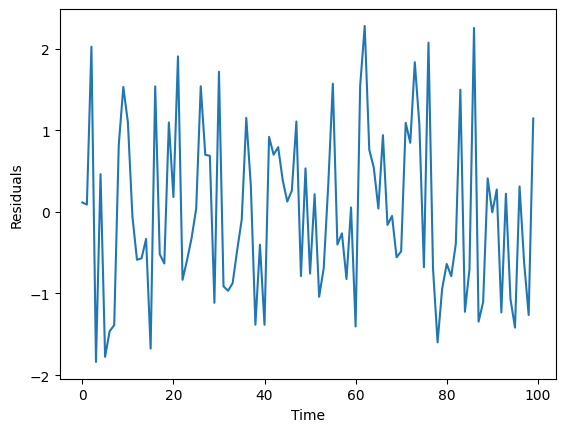

In [12]:
# Visualization
plt.plot(results.resid)

plt.xlabel('Time')
plt.ylabel('Residuals')

plt.show()

## 11.3. ARMA Model

### 11.3.1. Basics

In [13]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA   # Import ARIMA module but do not use Differential

In [14]:
# Generate data
np.random.seed(85)

n = 100

ar_params = [0.7]  # Parameter of AR(Autoregressive)
ma_params = [0.4, -0.2]  # Parameter of MA(Moving Average)

residuals = np.random.normal(0, 1, n)  # Residuals with mean=0, std=1

residuals

array([ 0.17685072,  2.37775412,  0.99873286, -1.3101508 ,  0.18018992,
       -1.76475402, -1.44312587, -1.39928556,  0.820354  ,  1.29529932,
        0.94219742, -0.23193229, -0.63139797, -0.64217702, -0.3816716 ,
       -1.763444  ,  1.61166821, -0.87810839, -0.49857707,  0.9072434 ,
        0.04132942,  1.81547474, -1.13014095, -0.472347  , -0.49749088,
        0.03893678,  1.37619473,  0.49143236,  0.58691089, -1.28411633,
        1.77991031, -1.28899836, -0.7837429 , -1.05893758, -0.40723875,
       -0.24230475,  1.10712328,  0.07290062, -1.41250679, -0.40525999,
       -1.49408672,  0.9798706 ,  0.41184028,  0.75550261,  0.16458909,
        0.07190816,  0.11921819,  1.01405789, -0.99952508,  0.5912005 ,
       -1.00955693,  0.30479321, -1.28071705, -0.57713752,  0.17421722,
        1.49095478, -0.66886635, -0.20829663, -0.99533815,  0.09756482,
       -1.59562468,  1.65746654,  1.88665906,  0.62858263,  0.37554766,
       -0.07206125,  0.84578067, -0.35486174, -0.06712955, -0.70

In [15]:
# Create ARMA(1, 2) model

data = [0, 0]  # Initial value

for i in range(2, n):   # Run ARMA(1,2) model from 2 to n
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term + ma_term + residuals[i])
    
data

[0,
 0,
 1.9144643628259845,
 -0.04608342517417241,
 -0.5758753666552521,
 -1.833760648162814,
 -3.4686979144519463,
 -4.051673641085645,
 -2.286906598691356,
 0.30246341186003645,
 1.5079707382420309,
 0.9414663336234558,
 -0.2535839326216547,
 -1.0258585052656706,
 -1.2303637707056696,
 -2.6489318792074354,
 -0.8716273841621822,
 -0.49089147190391713,
 -1.5157780953239341,
 -0.177610413425484,
 0.379614901974198,
 1.9162882600011244,
 0.9291848450830249,
 -0.6370689380415651,
 -0.9063497502782848,
 -0.7000349999963752,
 1.001243117082622,
 1.7349930737494008,
 1.7227400365053485,
 0.058279575226864555,
 1.189677303083719,
 0.512563146639073,
 -1.296530099336254,
 -2.022206133369219,
 -2.0896094925876527,
 -1.6561393801593898,
 -0.0676484366803407,
 0.5168569728915368,
 -1.2429713230056474,
 -1.8549227554007215,
 -2.672135285116547,
 -1.4072067933682262,
 0.11756110896373134,
 0.8065573791457711,
 0.9490122424122492,
 0.6509518466868851,
 0.5707299311426501,
 1.4468744889603882,
 0.39

In [16]:
# Create a DataFrame
df = pd.DataFrame({'Values': data})

df

,Values
0,0.000000
1,0.000000
2,1.914464
3,-0.046083
4,-0.575875
...,...
95,-3.203029
96,-2.278102
97,-1.989047
98,-3.010800


In [26]:
# Fit ARMA(1, 2) model
model = ARIMA(df['Values'], 
              order=(1, 0, 2))   # AR=1, Difference=0, MA=2 
                                 # Use 'ARIMA' module without Difference(=0) is 'ARMA model'
results = model.fit()

results.summary()

# Results:
# 'const': An estimate of the constant => p-value=-0.979 => The constant terms are not significant
# 'al.L1': An estimated coefficient of AR(1) => p-value=0.020 => AR(1) is significant
# 'ma.L1': An estimated coefficient of MA(1) => p-value=0.067 => MA(1) is not significant
# 'ma.L2': An estimated coefficient of MA(2) => p-value=0.788 => MA(2) is not significant
# 'sigma2': Estimates of Variance of Residuals => p-value=0.000 => Residuals are significant, so it contains meaningful information

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -144.699
Date:                Fri, 02 Jun 2023   AIC                            299.398
Time:                        23:35:26   BIC                            312.423
Sample:                             0   HQIC                           304.669
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3556      0.318     -1.118      0.264      -0.979       0.268
ar.L1          0.5324      0.230      2.319      0.020       0.082       0.982
ma.L1          0.4525      0.247      1.833      0.067      -0.031       0.936
ma.L2         -0.0584      0.217     -0.269      0.788      -0.483       0.367
sigma2         1.0471      0.200      5.226      0.000       0.654       1.440
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.77
Prob(Q):                              1.00   Prob(JB):                         0.15
Heteroskedasticity (H):               0.99   Skew:                             0.32
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

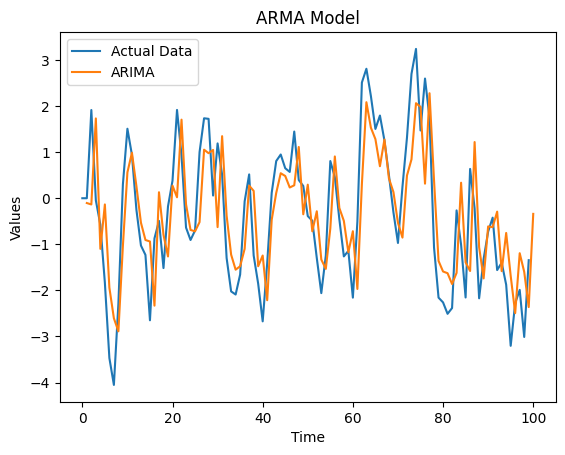

In [28]:
# Visualization
pred = results.predict(start=1, end=n)  # Prediction result

plt.plot(df['Values'], label='Actual Data')
plt.plot(pred, label='ARIMA')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('ARMA Model')
plt.legend()

plt.show()

### 11.3.2. Exercise

In [20]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Generate data
np.random.seed(85)

n = 100
ar_params = [0.7]
ma_params = [0.4, -0.2]
residuals = np.random.normal(0, 1, n)

residuals

array([ 0.17685072,  2.37775412,  0.99873286, -1.3101508 ,  0.18018992,
       -1.76475402, -1.44312587, -1.39928556,  0.820354  ,  1.29529932,
        0.94219742, -0.23193229, -0.63139797, -0.64217702, -0.3816716 ,
       -1.763444  ,  1.61166821, -0.87810839, -0.49857707,  0.9072434 ,
        0.04132942,  1.81547474, -1.13014095, -0.472347  , -0.49749088,
        0.03893678,  1.37619473,  0.49143236,  0.58691089, -1.28411633,
        1.77991031, -1.28899836, -0.7837429 , -1.05893758, -0.40723875,
       -0.24230475,  1.10712328,  0.07290062, -1.41250679, -0.40525999,
       -1.49408672,  0.9798706 ,  0.41184028,  0.75550261,  0.16458909,
        0.07190816,  0.11921819,  1.01405789, -0.99952508,  0.5912005 ,
       -1.00955693,  0.30479321, -1.28071705, -0.57713752,  0.17421722,
        1.49095478, -0.66886635, -0.20829663, -0.99533815,  0.09756482,
       -1.59562468,  1.65746654,  1.88665906,  0.62858263,  0.37554766,
       -0.07206125,  0.84578067, -0.35486174, -0.06712955, -0.70

In [22]:
# Create a DataFrame
df = pd.DataFrame({'Values': data})

df

,Values
0,0.000000
1,0.000000
2,1.914464
3,-0.046083
4,-0.575875
...,...
95,-3.203029
96,-2.278102
97,-1.989047
98,-3.010800


In [24]:
# Load ARIMA model
model = ARIMA(df['Values'], order=(1, 0, 2))  # AR=1, Difference=0, MR=2
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -144.699
Date:                Fri, 02 Jun 2023   AIC                            299.398
Time:                        23:22:13   BIC                            312.423
Sample:                             0   HQIC                           304.669
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3556      0.318     -1.118      0.264      -0.979       0.268
ar.L1          0.5324      0.230      2.319      0.020       0.082       0.982
ma.L1          0.4525      0.247      1.833      0.067      -0.031       0.936
ma.L2         -0.0584      0.217     -0.269      0.788      -0.483       0.367
sigma2         1.0471      0.200      5.226      0.000       0.654       1.440
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.77
Prob(Q):                              1.00   Prob(JB):                         0.15
Heteroskedasticity (H):               0.99   Skew:                             0.32
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

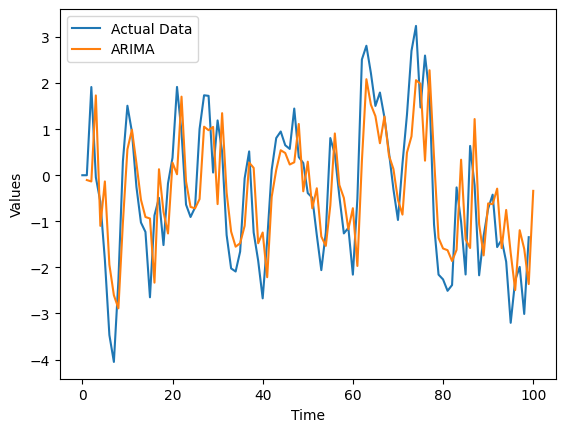

In [25]:
# Visualization
pred = results.predict(start=1, end=n)

plt.plot(df['Values'], label='Actual Data')
plt.plot(pred, label='ARIMA')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

## 11.4. ARIMA Model

### 11.4.1. Select the Order of Model using AIC (Akaike's Information Criterion)

In [29]:
# Import modules
import numpy as np
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

In [48]:
# Generate data
np.random.seed(850)

n = 100
data = np.random.normal(0, 1, n)

data

array([-1.80790848e+00,  1.29186993e+00, -4.81222550e-01, -3.55861243e-01,
       -8.09486391e-01, -3.33394868e-01, -7.13619058e-01,  4.13307208e-01,
       -1.07718167e+00, -1.65494303e+00, -6.30398020e-01, -1.32804461e+00,
       -1.53147957e+00,  4.04687625e-01, -3.70686782e-02, -1.79263673e+00,
        1.17264642e+00, -1.49062459e-01,  1.63226785e+00, -9.74935305e-01,
       -1.34683093e+00, -6.71564003e-01, -1.59610992e+00,  1.07218899e+00,
       -9.80604930e-01, -3.06388564e-01,  9.40736257e-01, -1.53203079e+00,
        4.55730878e-01,  1.78971024e-01,  6.67214948e-01,  4.63557407e-01,
        1.20757909e+00,  9.72871602e-01, -7.42730664e-01,  3.40564325e-01,
        1.06026727e+00,  7.61832702e-02, -2.05662155e+00,  2.68656991e-01,
        1.98687065e+00, -1.67232905e+00,  2.63781345e-01, -9.69308053e-01,
        1.10959145e-01, -6.76423636e-01,  5.80503764e-01, -2.73512488e-01,
       -1.81155897e+00,  8.93364239e-01, -1.05104652e+00, -1.72436283e+00,
       -3.37491776e-02,  

In [52]:
# Calculate AIC(Akaike Information Criterion)
best_aic = np.inf  # 'np.inf': Assign an infinite value to the 'best_aic' value
best_order = None  # Initial value not assigned

print(best_aic)
print(best_order)

inf
None


In [53]:
# Explore all possible order combinations
for p in range(3):
    for d in range(2):
        for q in range(3):
            order = (p, d, q)
            try:                # Create a model and Load the model
                model = ARIMA(data, order=order)
                results = model.fit()  # Fit the model
                aic = results.aic      # Get a new AIC
                if aic < best_aic:     # Compare the existing AIC and the new AIC -> Leave higher AIC
                    best_aic = aic
                    best_order = order
            except:
                continue

print("The Best AIC: ", best_aic)
print("Best Order: ", best_order)

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The Best AIC:  299.8527873480488
Best Order:  (0, 0, 0)


### 11.4.2. Exercise with 'ADF Test'

#### Preparation

In [54]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [57]:
# Load dataset
data = pd.read_csv('./data/airline-passengers.csv')

data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [58]:
# Prepare data
data['Month'] = pd.to_datetime(data['Month']) # Change types of 'Month' column to datetime type
data.set_index('Month', inplace=True)  # Set 'Month' as an index

data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#### Explore the dataset

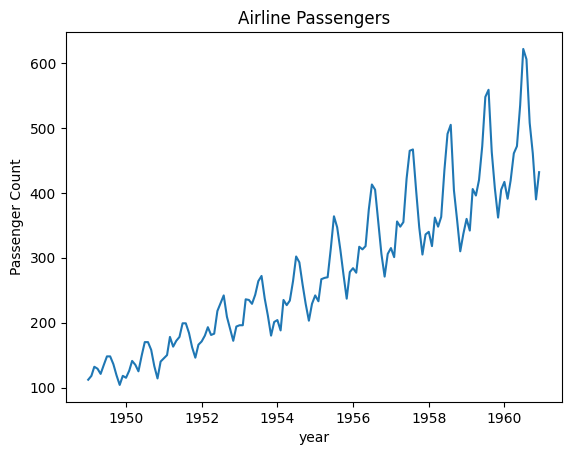

In [60]:
# Visualization: Line Plot
plt.plot(data)

plt.xlabel('year')
plt.ylabel('Passenger Count')
plt.title('Airline Passengers')

plt.show()

# Results:
# - There's a seasonality
# - Increasing with time

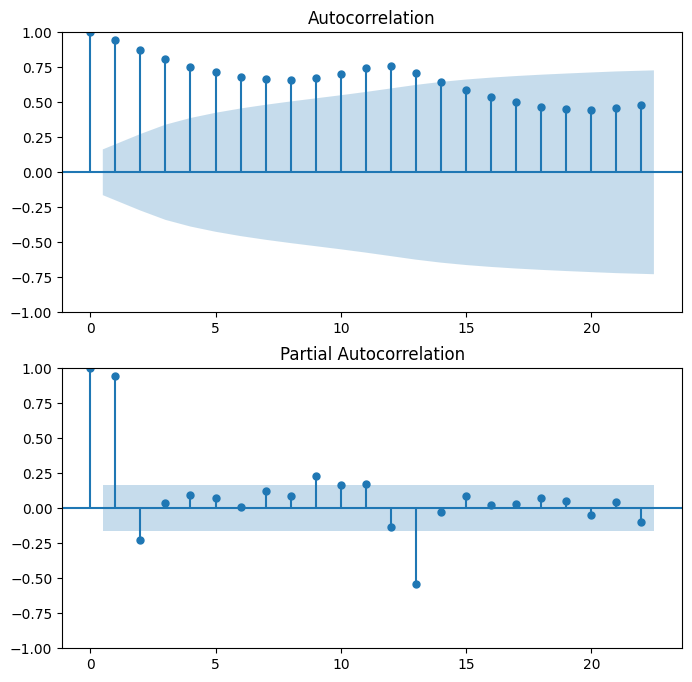

In [61]:
# Visualization: ACF(Autocorrelation Function) Graph
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # X-axis: lag, Y-axis: Autocorrelation Coefficient

plot_acf(data, ax=ax1)  # ACF(Autocorrelation Function)
plot_pacf(data, ax=ax2) # PACF(Partial Autocorrelation Function)

plt.show()


# Results: The Autocorrelation coefficinet decreasing
# 
# Reference:
# 1. Autocorrelation coefficient decreases with increasing lag
#   -> the time series data can be considered as independent observations
# 2. Autocorrelation coefficient shows a constant pattern without decreasing
#   -> the time series data can be considered to have correlation

#### ADF Test

- ADF(Augmented Dickey Fuller) Test
  - Test unit roots for 'normality'
  - Check if a time series is stationary or not

In [63]:
# ADF Test
results = adfuller(data['Passengers'])

results

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [67]:
# Results
print('ADF Statistic: ', results[0])
print('p-value: ', results[1])
print('Critical Value: ')
for key, value in results[4].items():
    print(f'{key}: {value}')
    
    
# Results: Fail to reject H0 as 1) p-value is '0.9919', 2) ADF statistic is higher than Critical Values
#          => the time series data is likely non-stationary 
# ADF statistic: 0.8154 => greater than Critical Values


# Reference:
# H0: Time series contains a unit root
# H1: Time series is stationary (p-value < 0.05)

ADF Statistic:  0.8153688792060441
p-value:  0.9918802434376409
Critical Value: 
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


#### Modelling

In [68]:
# Load ARIMA model
model = ARIMA(data, order=(2, 1, 2))
results = model.fit()

results.summary()

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sat, 03 Jun 2023   AIC                           1353.347
Time:                        01:03:35   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.792      0.000      -2.087      -1.599
ma.L2          0.9953      0.135      7.372      0.000       0.731       1.260
sigma2       665.9562    114.130      5.835      0.000     442.266     889.646
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
# Prediction
pred = results.predict(start='1950-01-01', end='1961-12-01')

pred

1950-01-01    121.157087
1950-02-01    120.594891
1950-03-01    132.839970
1950-04-01    146.351130
1950-05-01    137.425575
                 ...    
1961-08-01    539.727094
1961-09-01    508.526738
1961-10-01    478.147109
1961-11-01    456.748439
1961-12-01    449.699139
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

#### Visualization

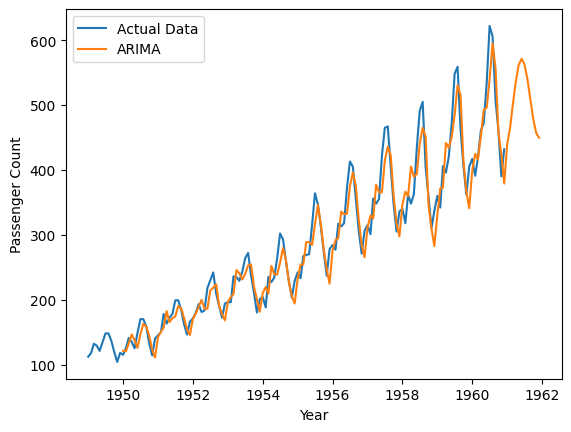

In [70]:
# Visualization
plt.plot(data, label='Actual Data')
plt.plot(pred, label='ARIMA')

plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()

plt.show()

### 11.4.3. Seasonal ARIMA

- ARIMA model
  - Compensate for the abnormalities of the time series
  - (p, d, q): p=Autoregressive(AR), d=Difference, q=Moving Average(MA)
  - For the seasonal data, additional consideration is needed

- Seasonal ARIMA
  - Seasonal components added => to get more accurate seasonal patterns
  - (p, d, q) + (P, D, Q, S)
      - P: Seasonal AR
      - D: Seasonal Difference
      - Q: Seasonal MA
      - S: Seasonal Cycle

#### Preparation

In [71]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX  # Seasonal ARIMA

In [72]:
# Generate data
np.random.seed(85)

n = 100
data = np.random.normal(0, 1, n)  # Generate a normally distributed time series data (mean=0, std=1)
dates = pd.date_range(start='2022-01-01', periods=n, freq='M')

In [76]:
# Create a dataframe
df = pd.DataFrame({'Values': data}, index=dates)

df

,Values
2022-01-31,0.176851
2022-02-28,2.377754
2022-03-31,0.998733
2022-04-30,-1.310151
2022-05-31,0.180190
...,...
2029-12-31,-1.323586
2030-01-31,0.237933
2030-02-28,-0.754266
2030-03-31,-1.269174


#### Explore the dataset

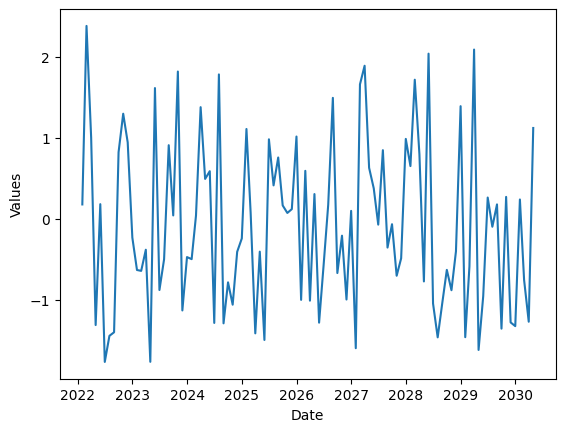

In [78]:
# Visualization
plt.plot(df)

plt.xlabel('Date')
plt.ylabel('Values')

plt.show()

# Result:
#  - There's a pattern to randomly changes over time
#    => Overall normal characteristics with slight fluctuations

#### Modelling

In [81]:
# Load Seasonal ARIMA model
model = SARIMAX(df, 
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))  # 12: Seasonal cycle
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Values   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -143.689
Date:                            Sat, 03 Jun 2023   AIC                            297.379
Time:                                    01:26:01   BIC                            309.709
Sample:                                01-31-2022   HQIC                           302.344
                                     - 04-30-2030                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.124      0.118      0.906      -0.229       0.258
ma.L1         -0.9989      2.635     -0.379      0.705      -6.164       4.166
ar.S.L12      -0.0106      0.195     -0.054      0.957      -0.393       0.372
ma.S.L12      -0.9991     62.435     -0.016      0.987    -123.369     121.371
sigma2         1.1047     70.344      0.016      0.987    -136.766     138.976
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.37
Prob(Q):                              0.96   Prob(JB):                         0.19
Heteroskedasticity (H):               0.82   Skew:                             0.13
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""